In [ ]:
# Для роботи з даними
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Для роботи з Keras
from keras.models import Sequential # модель прямого розповсюдження
from keras.layers import Dense # повнозв'язні прошарки

In [ ]:
data = pd.read_csv('/content/music.csv')
data[:5]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,-23.357929,0.503118,-11.805832,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [ ]:
data = data.drop('filename', axis=1)
data[:5]

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,-23.357929,0.503118,-11.805832,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         1000 non-null   float64
 1   rmse                1000 non-null   float64
 2   spectral_centroid   1000 non-null   float64
 3   spectral_bandwidth  1000 non-null   float64
 4   rolloff             1000 non-null   float64
 5   zero_crossing_rate  1000 non-null   float64
 6   mfcc1               1000 non-null   float64
 7   mfcc2               1000 non-null   float64
 8   mfcc3               1000 non-null   float64
 9   mfcc4               1000 non-null   float64
 10  mfcc5               1000 non-null   float64
 11  mfcc6               1000 non-null   float64
 12  mfcc7               1000 non-null   float64
 13  mfcc8               1000 non-null   float64
 14  mfcc9               1000 non-null   float64
 15  mfcc10              1000 non-null   float64
 16  mfcc11 

In [ ]:
data['label'].value_counts(normalize=True)

metal        0.1
blues        0.1
classical    0.1
country      0.1
disco        0.1
rock         0.1
jazz         0.1
hiphop       0.1
reggae       0.1
pop          0.1
Name: label, dtype: float64

In [ ]:
data.isnull().sum()

chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [ ]:
data['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [ ]:
 def label_to_numeric(a):
     if a == 'blues':
         return 1
     if a == 'classical':
         return 2
     if a == 'country':
         return 3
     if a == 'disco':
         return 4
     if a == 'hiphop':
         return 5
     if a == 'jazz':
         return 6
     if a == 'metal':
         return 7
     if a == 'pop':
         return 8
     if a == 'reggae':
         return 9
     if a == 'rock':
         return 10

 data['Label'] = data['label'].apply(label_to_numeric)
 data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,Label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues,1
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues,1
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues,1
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues,1
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,-23.357929,0.503118,-11.805832,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues,1


In [ ]:
data['Label'].value_counts(normalize=True)

10    0.1
9     0.1
8     0.1
7     0.1
6     0.1
5     0.1
4     0.1
3     0.1
2     0.1
1     0.1
Name: Label, dtype: float64

In [ ]:
X = data.drop(['Label','label'], axis = 1)
X

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,-23.357929,0.503118,-11.805832,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,59.040672,-7.490499,19.731213,-16.481268,18.078421,-22.209015,15.402501,-12.380283,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238
996,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,49.122971,-8.375370,22.869043,-18.311548,20.091076,-22.100393,10.800343,-12.982494,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677
997,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,52.834530,-13.480978,21.755636,-12.418755,20.130632,-18.361841,10.113327,-16.048916,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002
998,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,56.595062,10.443339,20.611948,-10.250206,15.563110,-8.238567,12.796227,-9.000731,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596


In [ ]:
Y = pd.get_dummies(data.Label, prefix='Label')
Y

,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(150, input_dim=X_train.shape[1], activation="relu"))

In [ ]:
#model.add(Dense(15, activation="relu"))

In [ ]:
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss, accuracy)

Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 1.9933 - accuracy: 0.2825 - val_loss: 1.6537 - val_accuracy: 0.3906
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.4418 - val_loss: 1.4793 - val_accuracy: 0.5000
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 1.3705 - accuracy: 0.5388 - val_loss: 1.3750 - val_accuracy: 0.5391
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 1.2494 - accuracy: 0.5609 - val_loss: 1.3014 - val_accuracy: 0.5625
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 1.1610 - accuracy: 0.6150 - val_loss: 1.2381 - val_accuracy: 0.5703
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 1.0957 - accuracy: 0.6454 - val_loss: 1.1956 - val_accuracy: 0.5859
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 1.0429 - accuracy: 0.6579 - val_loss: 1.1649 - val_accuracy: 0.5938
Epoch 8/50
46/46 [==

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss, accuracy)

1.0779366493225098 0.6333333253860474


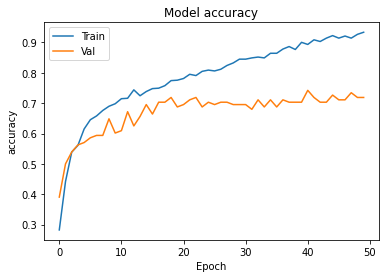

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
sample = X_test[9:10]
prediction = model.predict(sample)
print(prediction)

[[2.8117976e-01 9.1785222e-04 3.8892319e-03 2.3365888e-05 1.6253600e-05
  7.0403409e-01 5.2202731e-09 2.0572357e-05 8.5227005e-03 1.3960554e-03]]


In [ ]:
score = np.max(prediction)
prediction = np.argmax(prediction)

print(f'Передбачено: {prediction} з достовірністю {score*100:.2f}%', f'Повинно бути: {np.argmax(Y_test[0:1])}', sep='\n')

Передбачено: 5 з достовірністю 70.40%
Повинно бути: 3


In [ ]:
model.save('mobile_price.h5')